# DATA

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
initial_data = yf.download("ZM ^VIX", start="2020-11-01", end="2021-11-01")

[*********************100%***********************]  2 of 2 completed


In [3]:
initial_data.head()

Adj Close                  Close                   High  \
                    ZM       ^VIX          ZM       ^VIX          ZM   
Date                                                                   
2020-11-02  453.000000  37.130001  453.000000  37.130001  477.000000   
2020-11-03  451.510010  35.549999  451.510010  35.549999  461.880005   
2020-11-04  483.700012  29.570000  483.700012  29.570000  484.940002   
2020-11-05  496.730011  27.580000  496.730011  27.580000  499.350006   
2020-11-06  500.109985  24.860001  500.109985  24.860001  505.880005   

                              Low                   Open              Volume  \
                 ^VIX          ZM       ^VIX          ZM       ^VIX       ZM   
Date                                                                           
2020-11-02  38.779999  440.000000  36.130001  462.290009  38.570000  8051900   
2020-11-03  36.439999  445.010010  34.189999  456.328003  36.439999  6497000   
2020-11-04  36.849998  455.399994  28.030001  471.920013  36.790001  8048500   
2020-11-05  28.139999  480.760986  26.040001  497.989990  27.559999  6379900   
2020-11-06  29.440001  482.730011  24.559999  494.660004  27.870001  4266000   

                 
           ^VIX  
Date             
2020-11-02    0  
2020-11-03    0  
2020-11-04    0  
2020-11-05    0  
2020-11-06    0

In [4]:
initial_data['Adj Close'].head()

,ZM,^VIX
Date,,
2020-11-02,453.000000,37.130001
2020-11-03,451.510010,35.549999
2020-11-04,483.700012,29.570000
2020-11-05,496.730011,27.580000
2020-11-06,500.109985,24.860001


In [5]:
data = initial_data['Adj Close']
zm = data['ZM']
vix = data['^VIX']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-02 to 2021-10-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZM      251 non-null    float64
 1   ^VIX    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [6]:
data.head()

,ZM,^VIX
Date,,
2020-11-02,453.000000,37.130001
2020-11-03,451.510010,35.549999
2020-11-04,483.700012,29.570000
2020-11-05,496.730011,27.580000
2020-11-06,500.109985,24.860001


In [7]:
data.tail()

,ZM,^VIX
Date,,
2021-10-25,279.790009,15.240000
2021-10-26,278.700012,15.980000
2021-10-27,272.809998,16.980000
2021-10-28,276.579987,16.530001
2021-10-29,274.649994,16.260000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

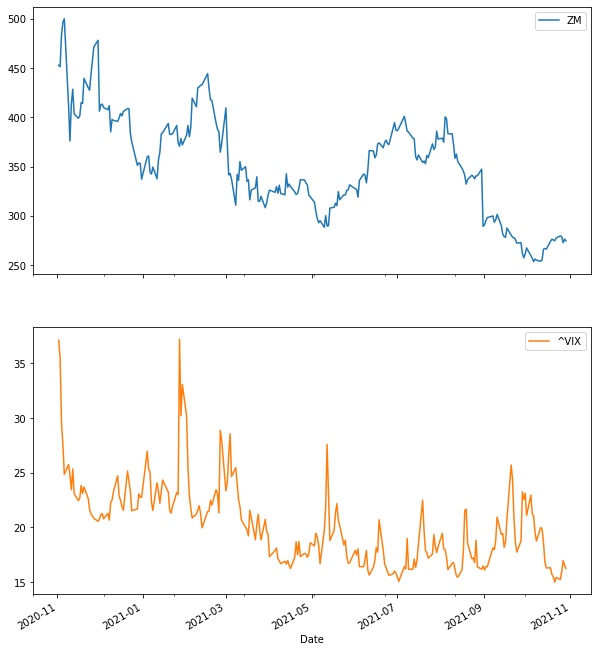

In [8]:
data.plot(figsize=(10,12), subplots=True)

In [9]:
data.describe().round(2)

,ZM,^VIX
count,251.00,251.00
mean,350.58,20.27
std,51.24,3.80
min,253.65,15.01
25%,317.71,17.25
50%,348.41,19.66
75%,385.29,22.49
max,500.11,37.21


In [10]:
data.diff().head()

,ZM,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,-1.489990,-1.580002
2020-11-04,32.190002,-5.980000
2020-11-05,13.029999,-1.990000
2020-11-06,3.379974,-2.719999


In [11]:
data.diff().describe().round(2)

,ZM,^VIX
count,250.00,250.00
mean,-0.71,-0.08
std,13.69,1.94
min,-86.87,-7.00
25%,-5.94,-0.96
50%,-0.40,-0.26
75%,5.06,0.74
max,37.33,14.19


In [12]:
data.pct_change().round(4).head()

,ZM,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,-0.0033,-0.0426
2020-11-04,0.0713,-0.1682
2020-11-05,0.0269,-0.0673
2020-11-06,0.0068,-0.0986


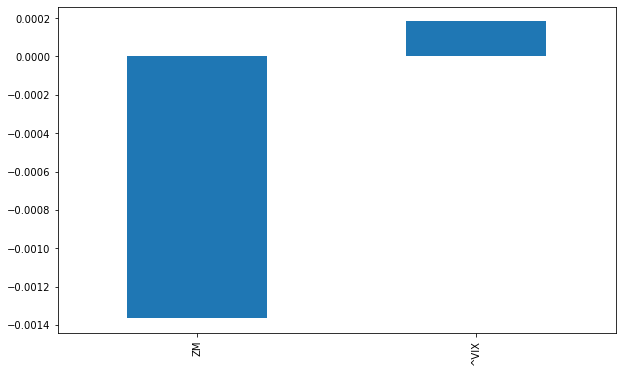

In [13]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [14]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,ZM,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,-0.0033,-0.0435
2020-11-04,0.0689,-0.1842
2020-11-05,0.0266,-0.0697
2020-11-06,0.0068,-0.1038


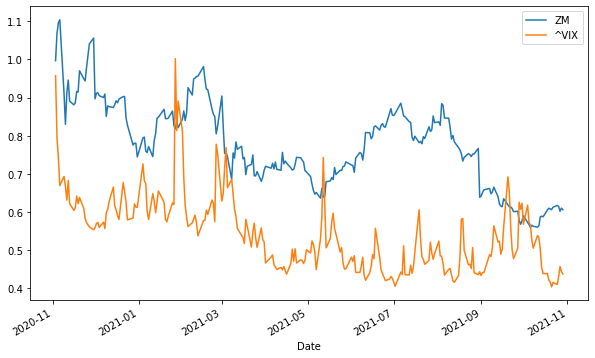

In [15]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [16]:
sym = 'ZM'
ZM_data = pd.DataFrame(data[sym]).dropna()
ZM_data.tail()

,ZM
Date,
2021-10-25,279.790009
2021-10-26,278.700012
2021-10-27,272.809998
2021-10-28,276.579987
2021-10-29,274.649994


In [17]:
window = 10
ZM_data['min'] = data[sym].rolling(window=window).min()
ZM_data['mean'] = data[sym].rolling(window=window).mean()
ZM_data['std'] = data[sym].rolling(window=window).std()
ZM_data['median'] = data[sym].rolling(window=window).median()
ZM_data['max'] = data[sym].rolling(window=window).max()
ZM_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
ZM_data.dropna().head()

,ZM,min,mean,std,median,max,ewma
Date,,,,,,,
2020-11-13,403.579987,376.01001,441.986002,42.137702,440.075012,500.109985,408.533577
2020-11-16,399.149994,376.01001,436.601001,43.974622,420.990005,500.109985,401.495888
2020-11-17,401.630005,376.01001,431.613000,44.914483,413.289993,500.109985,401.596476
2020-11-18,415.040009,376.01001,424.747000,41.158210,413.289993,500.109985,411.679125
2020-11-19,414.290009,376.01001,416.503000,32.479299,413.289993,500.109985,413.637288


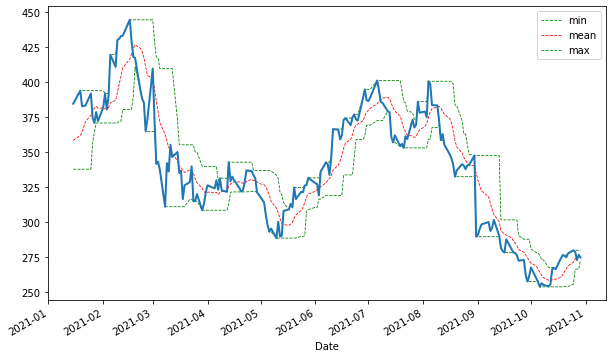

In [18]:
ax = ZM_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [19]:
ZM_data['SMA1'] = data[sym].rolling(window=20).mean()
ZM_data['SMA2'] = data[sym].rolling(window=60).mean()
ZM_data[[sym, 'SMA1', 'SMA2']].tail()

,ZM,SMA1,SMA2
Date,,,
2021-10-25,279.790009,264.875000,304.310331
2021-10-26,278.700012,265.715500,302.639332
2021-10-27,272.809998,266.485500,300.938165
2021-10-28,276.579987,267.239499,298.871498
2021-10-29,274.649994,267.596498,296.804331


<AxesSubplot:xlabel='Date'>

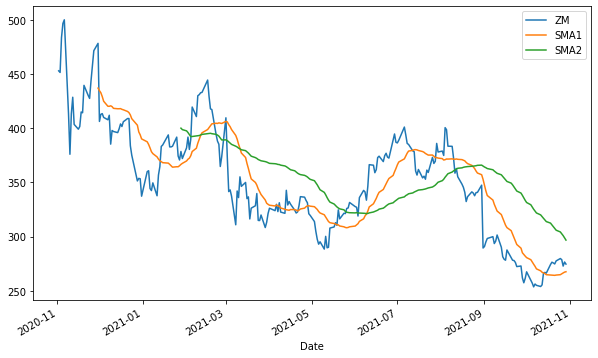

In [20]:
ZM_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

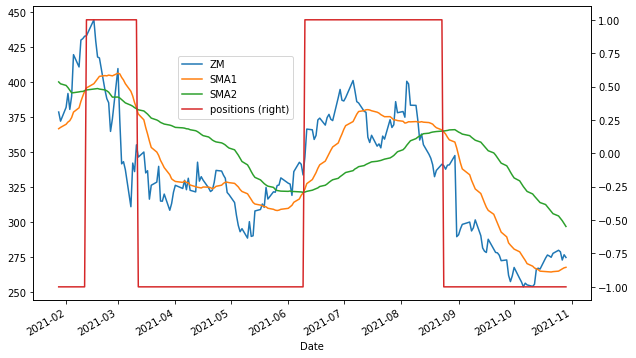

In [21]:
ZM_data.dropna(inplace=True)
ZM_data['positions'] = np.where(ZM_data['SMA1'] > ZM_data['SMA2'],1,-1)
ax = ZM_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Calculating Annualised Volatility and Market Volatility 

In [22]:
log_return = np.log(zm / zm.shift(1))

In [23]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 57.2 %


In [24]:
vix= vix[-1]
print('The market volatility is', round(vix,2),'%')

The market volatility is 16.26 %


# Binomial Tree

In [25]:
zm[-1]

274.6499938964844

In [26]:
S0 = zm[-1]              # spot stock price
K =   264.6499           # strike
T = 1.0               # maturity 
r =  0.0139             # risk free rate 
sig =  0.1626            # diffusion coefficient or volatility
N = 8                 # number of periods or number of time steps  
payoff = "call"          # payoff 

In [27]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [29]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [30]:
S

array([[274.6499939 , 290.90167366, 308.11500317, 326.34688547,
        345.6575907 , 366.11095534, 387.77459319, 410.72011895,
        435.02338491],
       [  0.        , 259.3062398 , 274.6499939 , 290.90167366,
        308.11500317, 326.34688547, 345.6575907 , 366.11095534,
        387.77459319],
       [  0.        ,   0.        , 244.81968866, 259.3062398 ,
        274.6499939 , 290.90167366, 308.11500317, 326.34688547,
        345.6575907 ],
       [  0.        ,   0.        ,   0.        , 231.1424515 ,
        244.81968866, 259.3062398 , 274.6499939 , 290.90167366,
        308.11500317],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        218.22931472, 231.1424515 , 244.81968866, 259.3062398 ,
        274.6499939 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 206.03759065, 218.22931472, 231.1424515 ,
        244.81968866],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.    

In [31]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.500748726668785

In [32]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
        170.37348491],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
        123.12469319],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         81.0076907 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         43.46510317],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         10.0000939 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.    

# European Option 

In [33]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 25.38472901,  35.67549036,  48.74992398,  64.59592132,
         82.84063066, 102.83695389, 124.04275554, 146.52964891,
        170.37348491],
       [  0.        ,  15.1515226 ,  22.68610747,  33.02620571,
         46.52149171,  63.07288402,  81.92575305, 101.92048529,
        123.12469319],
       [  0.        ,   0.        ,   7.64711484,  12.39401624,
         19.60548008,  30.08250054,  44.38316551,  62.15641542,
         81.0076907 ],
       [  0.        ,   0.        ,   0.        ,   2.91261231,
          5.20409364,   9.16532538,  15.84372665,  26.71120362,
         43.46510317],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.62440324,   1.24910768,   2.49881792,   4.99884125,
         10.0000939 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.    

In [34]:
print('European ' + payoff, str( V[0,0]))

European call 25.384729012864867


# American Option

In [35]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 25.38472901,  35.67549036,  48.74992398,  64.59592132,
         82.84063066, 102.83695389, 124.04275554, 146.52964891,
        170.37348491],
       [  0.        ,  15.1515226 ,  22.68610747,  33.02620571,
         46.52149171,  63.07288402,  81.92575305, 101.92048529,
        123.12469319],
       [  0.        ,   0.        ,   7.64711484,  12.39401624,
         19.60548008,  30.08250054,  44.38316551,  62.15641542,
         81.0076907 ],
       [  0.        ,   0.        ,   0.        ,   2.91261231,
          5.20409364,   9.16532538,  15.84372665,  26.71120362,
         43.46510317],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.62440324,   1.24910768,   2.49881792,   4.99884125,
         10.0000939 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.    

In [36]:
print('American ' + payoff, str( V[0,0]))

American call 25.384729012864867


# Monte Carlo Simulation

In [37]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [38]:
T = 1
r = 0.0139
sigma = 0.1628
S0 = 274.6499938964844
K = 264.6499

In [39]:
S = mcs_simulation_np(10000)

In [40]:
S = np.transpose(S)
S

array([[274.6499939 , 275.07954756, 275.02460173, ..., 276.5306806 ,
        276.18746461, 275.65641142],
       [274.6499939 , 274.57702081, 274.29771968, ..., 250.76660372,
        250.16965107, 250.18910288],
       [274.6499939 , 274.22177317, 274.78775814, ..., 400.87038996,
        401.46278332, 401.51795828],
       ...,
       [274.6499939 , 274.1606688 , 274.34524216, ..., 365.24557976,
        365.39011214, 365.1481443 ],
       [274.6499939 , 273.86856658, 273.92684522, ..., 253.91780562,
        254.35028328, 254.69936838],
       [274.6499939 , 274.16058967, 274.58656112, ..., 277.98764812,
        277.5040147 , 277.27044136]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

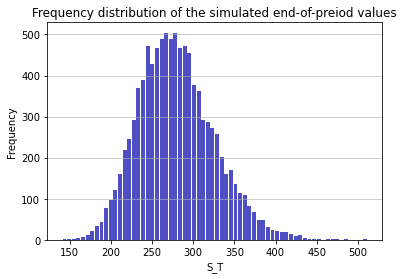

In [41]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [42]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 11.301212070026313


In [43]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 26.21325033474422


# Black Scholes Model

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

# European Options - Non Dividend Paying Options

In [45]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [46]:
euro_option_bs(274.6499, 264.6499, 1, 0.0139, 0.572, 'call')

67.3523547619595

In [47]:
S = np.linspace(50,250,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 264.6499, 1, 0.0139, 0.572, 'call')

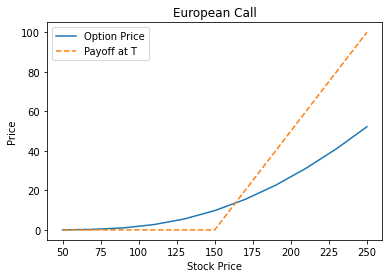

In [48]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-150,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# Greeks

In [49]:
import scipy.stats as si

In [50]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [51]:
euro_option_bsm(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'call')

67.3523547619595

In [52]:
euro_option_bsm(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'put')

53.69916960791598

In [53]:
S = np.linspace(50,250,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i],264.6499, 1, 0.0139, 0, 0.572, 'call')
    Put [i] = euro_option_bsm(S[i], 264.6499, 1, 0.0139, 0, 0.572, 'put')

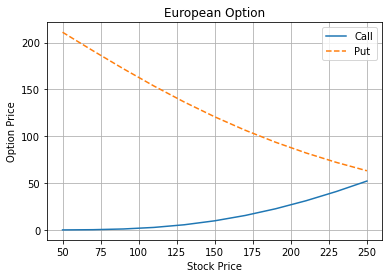

In [54]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

# Delta

In [55]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [58]:
delta(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'call')

0.6462226670069102

In [57]:
delta(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'put')

-0.35377733299308983

In [59]:
S = np.linspace(50,250,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 264.6499, 1, 0.0139, 0, 0.572, 'call')
    Delta_Put [i] = delta(S[i], 264.6499, 1, 0.0139, 0, 0.572, 'put')

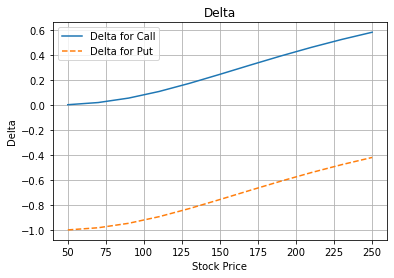

In [60]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

# 3D Surface Graph of Delta

In [61]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [62]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 264.6499, T[i], 0.0139, 0, 0.572, 'call')

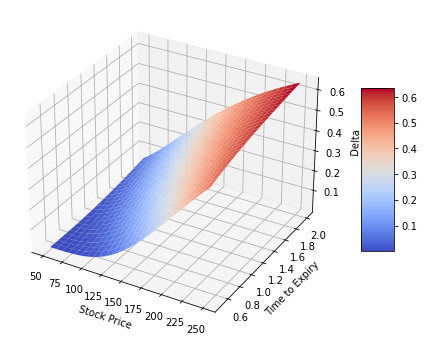

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [64]:
d = delta(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.6462 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.6462 .


# Gamma

In [65]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [66]:
gamma(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'call')

0.0023668737189146125

In [67]:
gamma(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'put')

0.0023668737189146125

In [68]:
S = np.linspace(50,250,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 264.6499, 1, 0.0139, 0, 0.572, 'call')

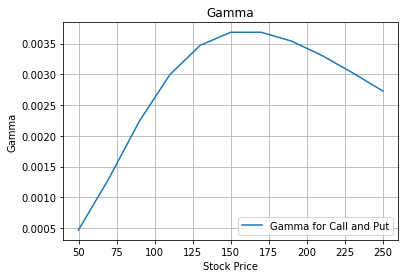

In [69]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

# 3D Surface Graph of Gamma

In [70]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [71]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 264.6499, T[i], 0.0139, 0, 0.572, 'call')

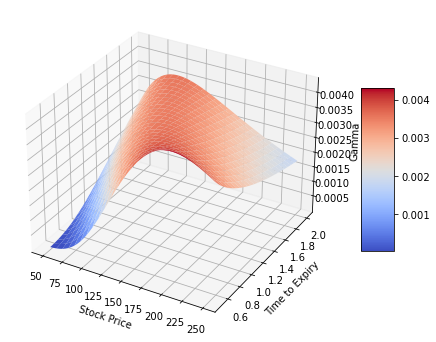

In [72]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed 

In [73]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [74]:
speed(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'call')

-1.4269699579068315e-05

In [75]:
speed(160.51, 150, 1, 0.0134, 0, 0.1413, 'put')

-0.0004952269369850919

In [76]:
S = np.linspace(50,250,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 264.6499, 1, 0.0139, 0, 0.572, 'call')

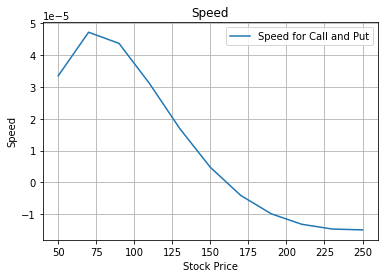

In [77]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

# 3D Surface Graph of Speed

In [78]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [79]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 264.6499, T[i], 0.0139, 0, 0.572, 'call')

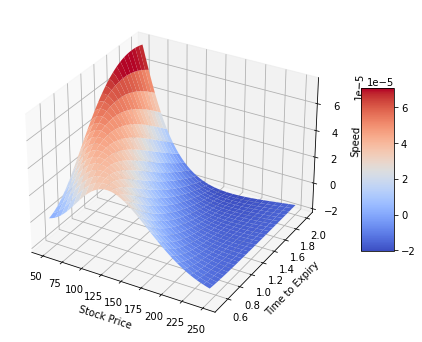

In [80]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta 

In [81]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [82]:
theta(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'call')

30.738454906331654

In [83]:
theta(160.51, 150, 1, 0.0134, 0, 0.1413, 'put')

4.284471192744859

In [84]:
T = np.linspace(0.1413,7,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(274.6499, 264.6499, T[i], 0.0139, 0, 0.572, 'call')
    Theta_Put [i] = theta(274.6499, 264.6499, T[i], 0.0139, 0, 0.572, 'put')

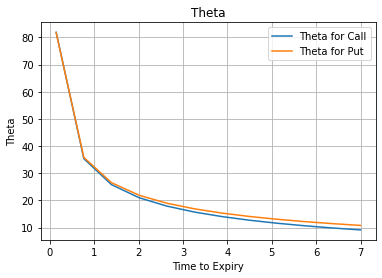

In [86]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

# 3D Surface Graph of Theta

In [87]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [88]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 264.6499, T[i], 0.0139, 0, 0.572, 'call')

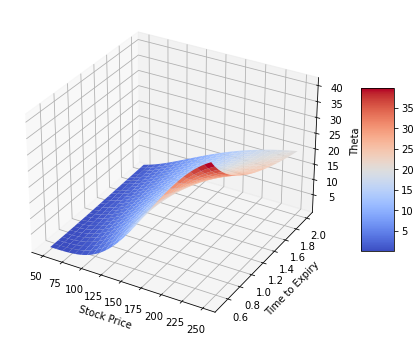

In [89]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [90]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [91]:
rho(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'call')

110.13263610922169

In [92]:
rho(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'put')

-150.8640787367348

In [94]:
r = np.linspace(0,0.0134,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(274.6499, 264.6499, 1, r[i], 0, 0.572, 'call')
    Rho_Put [i] = rho(274.6499, 264.6499, 1, r[i], 0, 0.572, 'put')

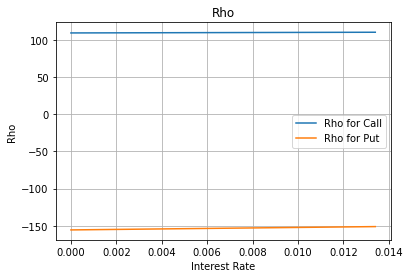

In [95]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

# 3D Surface Graph of Rho

In [96]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [97]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 264.6499, T[i], 0.0139, 0, 0.572, 'call')

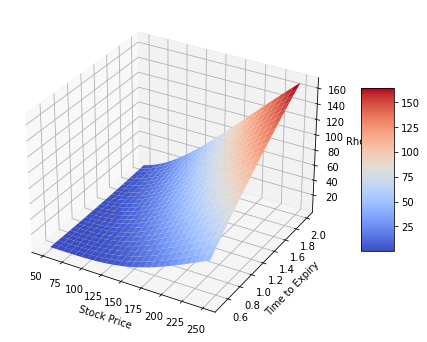

In [98]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

In [99]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [100]:
vega(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'call')

102.12451491053662

In [101]:
vega(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'put')

102.12451491053662

In [102]:
vol = np.linspace(0.1,0.1413,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(274.6499, 264.6499, 1, 0.0139, 0, vol[i], 'call')

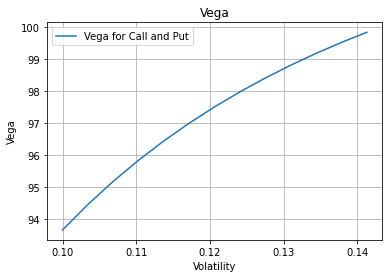

In [103]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

# 3D Surface Graph of Vega

In [104]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [105]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 264.6499, T[i], 0.0139, 0, 0.572, 'call')

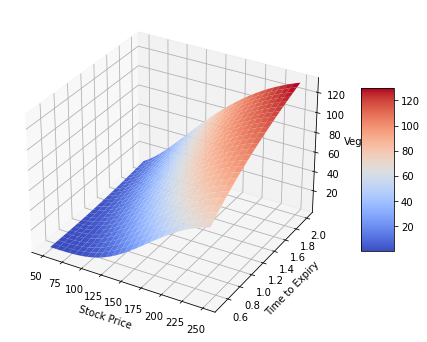

In [106]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [107]:
v = vega(274.6499, 264.6499, 1, 0.0139, 0, 0.572, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 102.1245 . If the volatility increases 1%, then the value of the option will increase $ 1.021245 .
